## <center> ANLY590-Homework2 </center>
### <center> Zhengqian Xu</center>

### 1. Feedforward: Building a ReLU neural network

#### 1. Draw a network with:
* 2 inputs
* 1 hidden layers with 3 hidden units and a
* 1-class output (for binary classification)


In [1]:
%%html
<img src="picture.jpg", width=400, heigth=320>

#### 2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).  

$$ 
h_1 = max(0,w_{11}x_1+ w_{12}x_2+b_{11}) \\
h_2 = max(0,w_{21}x_1+ w_{22}x_2+b_{12}) \\
h_3 = max(0,w_{31}x_1+ w_{32}x_2+b_{13}) \\
\hat{y} = \sigma(v_1h_1+v_2h_2+v_3h_3+c =v_1h_1+v_2h_2+v_3h_3+c)
$$

#### 3. Write out the forward-pass function in python, call it ff nn ReLu(...)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
def ff_nn_ReLu(x,w,b,v,c):
    h = np.dot(w.T,x)+b
    #print(h)
    a = np.where(h<0,0,h)
    #print(a)
    y = np.dot(a.T,v)+c
    z = 1/(1+np.exp(-y))
    #print(y,z)
    return z

#### 4. what are the class probabilities associated with the forward pass of each sample?

In [4]:
w = np.array([[1,-1,0],[0,0,0.5]])
b = np.array([0,0,1])
v = np.array([1,0,-1])
c=1

X = np.array([[1,-1],[0,-1],[0,1]])

In [5]:
y=[]
for x in X:
    y.append(ff_nn_ReLu(x,w,b,v,c))

In [6]:
y

[0.8175744761936437, 0.6224593312018546, 0.3775406687981454]

### 2. Gradient Descent
#### Consider a simple non-convex function of two variables:
$$ f(x,y) = (1-x^3)+100(y^2-x)^2 $$

#### 1. What are the partial derivatives of f with respect to x and to y?
$$
\frac{\partial f}{\partial x} = -3x^2-200(y^2-x) \\
\frac{\partial f}{\partial y} = 400y(y^2-x)
$$

#### 2. Create a visualization of the contours of this function.

In [7]:
delta = 0.025
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-1.0, 1.0, delta)

X, Y = np.meshgrid(x, y)
f = (1-X**3)+100*(Y**2-X)**2

<a list of 7 text.Text objects>

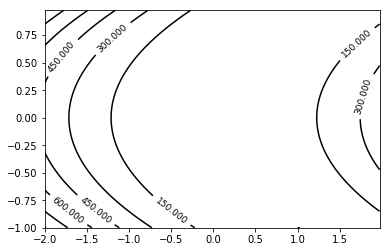

In [8]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, f, 6,colors='k')
ax.clabel(CS, fontsize=9, inline=1)
#ax.set_title('Single color - negative contours dashed')

#### 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [9]:
def f(X,Y):
    return (1-X**3)+100*(Y**2-X)**2

def grad_fx(x,y):
    
    return -3*x**2-200*(y**2-x)

def grad_fy(x,y):
    
    return 400*y*(y**2-x)

def grad_decent(x_0,y_0,iterations,stepsize):
    x = [x_0]
    y = [y_0]
    z = [f(x_0,y_0)]
    for i in range(0,iterations):
        x_tmp = x_0
        y_tmp = y_0
       
        x_0= x_0 -stepsize*grad_fx(x_tmp,y_tmp)
        y_0 = y_0 -stepsize*grad_fy(x_tmp,y_tmp)
        
        x.append(x_0)
        y.append(y_0)
        z.append(f(x_0,y_0))
    
    return x,y,z

In [10]:
def visual(alpha):
    x_0 = -1
    y_0 = -1
    iterations=100
    x,y,z = grad_decent(x_0,y_0,iterations,alpha)

    x_array = np.array(x)
    y_array = np.array(y)

    X, Y = np.meshgrid(x_array, y_array)
    f = (1-X**3)+100*(Y**2-X)**2


    fig, ax = plt.subplots()
    ax.plot(x,y,'o')
    CS = ax.contour(X, Y, f, 6,colors='k')
    ax.clabel(CS, fontsize=9, inline=1)
    plt.title('learning rate='+str(alpha))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    return z
#ax.set_title('Single color - negative contours dashed')

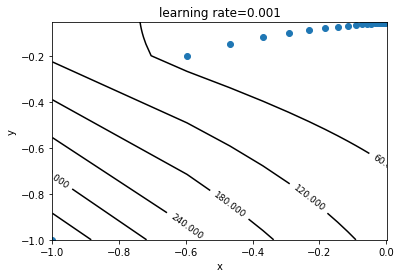

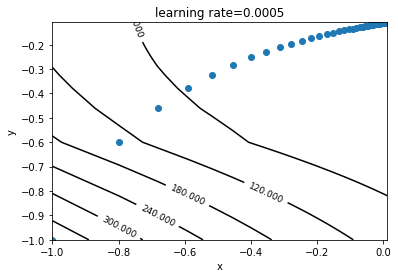

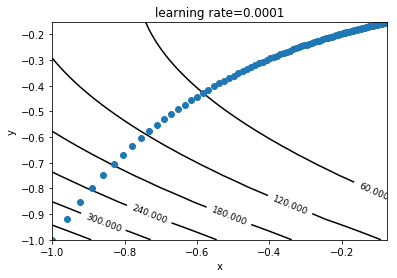

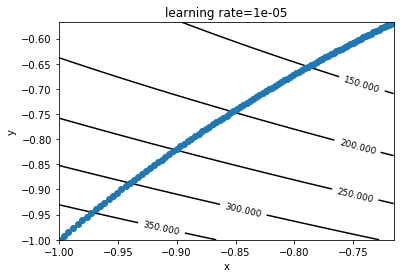

In [11]:
alphas = [0.001,0.0005,0.0001,0.00001]
for alpha in alphas:
    z = visual(alpha)
    #print(z)

#### 4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.


In [12]:
def grad_decent_mom(x_0,y_0,iterations,eps,alpha):
    x = [x_0]
    y = [y_0]
    z = [f(x_0,y_0)]
    dx = 0
    dy = 0
    for i in range(0,iterations):
        
        dx = alpha*dx+eps*grad_fx(x_0,y_0)
        dy = alpha*dy+eps*grad_fy(x_0,y_0)
        
        x_0= x_0 -dx
        y_0 = y_0 -dy
        
        x.append(x_0)
        y.append(y_0)
        z.append(f(x_0,y_0))
    
    return x,y,z

def visual(alpha,eps):
    x_0 = -1
    y_0 = -1
    iterations=50
    x,y,z = grad_decent_mom(x_0,y_0,iterations,eps,alpha)

    x_array = np.array(x)
    y_array = np.array(y)

    X, Y = np.meshgrid(x_array, y_array)
    f = (1-X**3)+100*(Y**2-X)**2


    fig, ax = plt.subplots()
    ax.plot(x,y,'o')
    CS = ax.contour(X, Y, f, 6,colors='k')
    ax.clabel(CS, fontsize=9, inline=1)
    plt.title('alpha='+str(alpha)+',eps='+str(eps))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

    return z

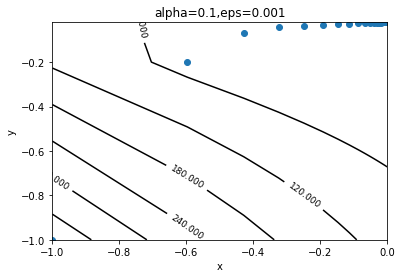

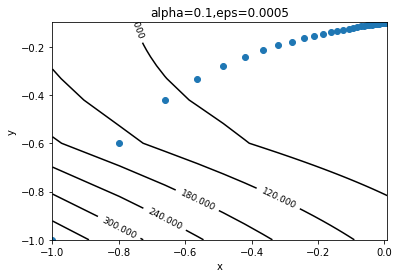

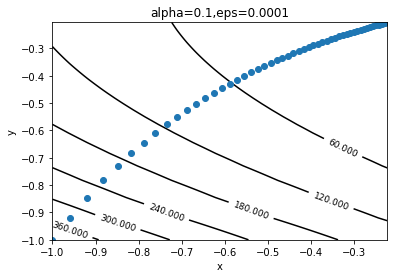

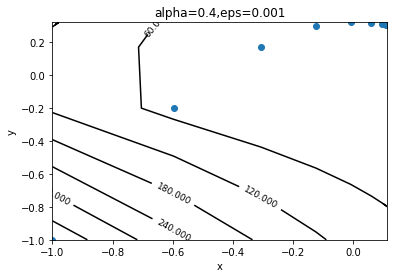

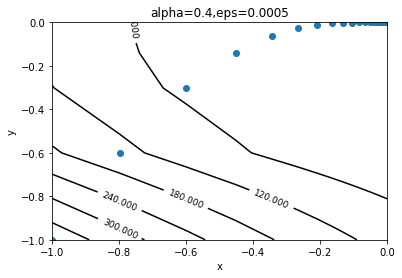

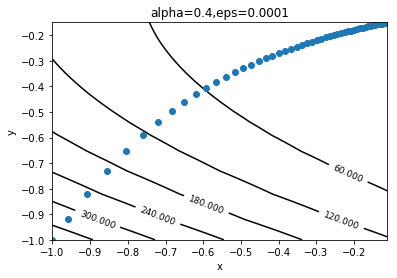

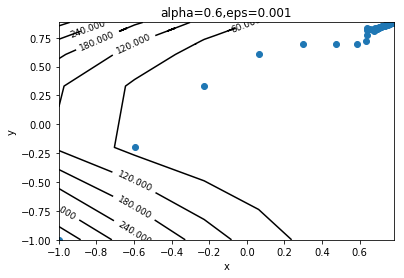

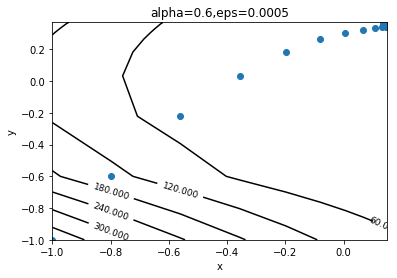

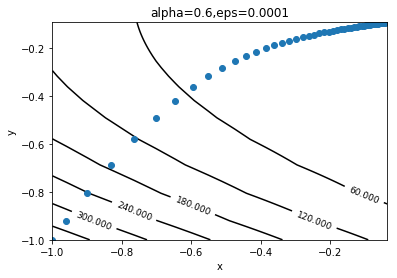

In [13]:
epses = [0.001,0.0005,0.0001]
alphas = [0.1,0.4,0.6]
for alpha in alphas:
    for eps in epses:
        visual(alpha,eps)

### 3. Backprop

#### 1. For the same network as in Question 1, derive expressions of the gradientof the Loss function with respect to each of the model parameters.

$$ 
h_1 = max(0,w_{11}x_1+ w_{12}x_2+b_{11}) \\
h_2 = max(0,w_{21}x_1+ w_{22}x_2+b_{12}) \\
h_3 = max(0,w_{31}x_1+ w_{32}x_2+b_{13}) \\
\hat{y} = \sigma(v_1h_1+v_2h_2+v_3h_3+c)  = \sigma(z)
$$

Loss function:
$$ l(x,\theta) = -ylog\hat{y}-(1-y)log(1-\hat{y}) $$

Gradient of each parameter:
$$  
\frac{\partial l}{\partial v_i} =  \frac{\partial l}{\partial \hat{y}}  \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial v_1} = (-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})h_i \\
\frac{\partial l}{\partial c} =  \frac{\partial l}{\partial \hat{y}}  \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial c}=(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y}) \\
\frac{\partial l}{\partial w_{ji}} =\frac{\partial l}{\partial \hat{y}}  \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial h_j}\frac{\partial h_j}{\partial w_{ji}} =(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})v_j x_i \\
\text{if $w_{j1}x_1+w_{j2}x_2+b_j >0$ ,
else $\frac{\partial l}{\partial w_{ji}}=0$} \\
\frac{\partial l}{\partial b_j} =\frac{\partial l}{\partial \hat{y}}  \frac{\partial \hat{y}}{\partial z}\frac{\partial z}{\partial h_j}\frac{\partial h_j}{\partial b_j} =(-\frac{y}{\hat{y}}+\frac{1-y}{1-\hat{y}})\hat{y}(1-\hat{y})v_j \\
\text{if $w_{j1}x_1+w_{j2}x_2+b_j >0$ ,
else $\frac{\partial l}{\partial b_j}=0$} \\
$$

#### 2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [14]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

def grad_f(y,x,w,b,v,c):
    #### input of hidden layer
    h = np.dot(w.T,x)+b
    #### output of hidden layer
    a = np.where(h<0,0,h)
    #### input of output layer
    z = np.dot(a.T,v)+c
    #### yhat
    yhat = sigmoid(z)
    
    #### dl/dv
    dv = (-y/yhat+(1-y)/(1-yhat))*yhat*(1-yhat)*a
    
    ##### dl/dc
    dc = (-y/yhat+(1-y)/(1-yhat))*yhat*(1-yhat)
    
    dw = np.zeros(shape=(3,2))
    db = np.zeros(shape=(3,1))
    
    ### whether h[j]>0, if h[j]<0, dwj=0
    for j in range(0,3):
        if h[j]<0:
            dw[j][0] = dw[j][1] =db[j]=0
            
        else:
            dw[j] = (-y/yhat+(1-y)/(1-yhat))*yhat*(1-yhat)*v[j]*x
            db[j] = (-y/yhat+(1-y)/(1-yhat))*yhat*(1-yhat)*v[j]
            
    return dv,dc,dw.T,db.T

In [15]:
w = np.array([[1,-1,0],[0,0,0.5]])
b = np.array([0,0,1])
v = np.array([1,0,-1])
c=1
x = np.array([1,-1])
dv,dc,dw,db =  grad_f(1,x,w,b,v,c)

In [16]:
dv,dc,dw,db

(array([-0.18242552, -0.        , -0.09121276]),
 -0.18242552380635635,
 array([[-0.18242552,  0.        ,  0.18242552],
        [ 0.18242552,  0.        , -0.18242552]]),
 array([[-0.18242552,  0.        ,  0.18242552]]))

#### 3. Generate a synthetic dataset like the XOR pattern (see below).

In [17]:
## sample size= N/2
N=400
x1 = np.random.uniform(-2,2,N*2).reshape(N,2)

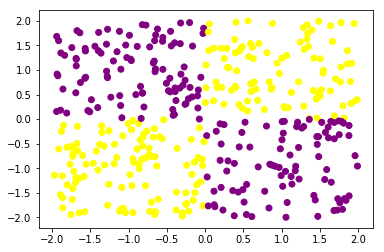

In [18]:
### if xy<0, color=purple; else,color=yellow
z=['yellow']*N
for i in range(0,N):
    if x1[i][0]*x1[i][1]<0:
        z[i] = 'purple'
plt.scatter(x1[:,0],x1[:,1],color=z)

#### 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [19]:
### forward function
def forward(y,x,w,b,v,c):
    #### input of hidden layer
    z1 = np.dot(w.T,x)+b
    #print('z1',z1)
    #### output of hidden layer
    a1 = np.where(z1<0,0,z1)
    #print('a1',a1)
    #### input of output layer
    z2 = np.dot(a1.T,v)+c
    #### yhat
    a2 = sigmoid(z2)
            
    return z1,a1,z2,a2

In [20]:
### binary loss function
def loss(y,yhat):
    return -y*np.log(yhat)-(1-y)*np.log(1-yhat)

In [21]:
def gradient_ann(y,X,w,b,v,c,lr,iterations):
    
    ## used for storing the total loss for each iteration
    losses= []
  
    
    for i in range(0,iterations):
        ### for each iteration, initializing the dw=db=dc=dv=0
        dw = np.zeros(shape=(3,2))
        db = np.zeros(shape=(3))
        dc = 0
        dv = np.zeros(shape=(3))
        
        ## sum of the binary loss of each input xi
        sumloss = 0
        y_hat = [] # only for final usage
        
        ### for each input (x,y), compute the partial derivative
        for m in range(0,len(y)):
            
            ## do the forward
            h,a,z,yhat = forward(y[m],X[m],w,b,v,c)
            ## add the loss
            sumloss += loss(y[m],yhat)
            
            ##### compute the partial derivative ####
            
            #### dl/dv
            dv += (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*a

            ##### dl/dc
            dc += (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)

            ### whether h[j]>0, if h[j]<0, dwj=0
            for j in range(0,3):
                if h[j]>0:
                    dw[j] +=  (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]*X[m]
                    db[j] +=  (-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]
            
            ## for final iteration use
            y_hat.append(yhat)
        
        ### append to loss
        losses.append(sumloss)
        
        ### take the average of partial derivative, update the parameters 
        w = w-lr*dw.T/len(y)
        v = v-lr*dv/len(y)
        c= c-lr*dc/len(y)
        b= b-lr*db/len(y)
        #print(w,v,c,b)
    return losses,y_hat

In [29]:
#### set the initial parameter
w = np.random.randn(6).reshape((2,3))
b = np.random.randn(3).reshape(3)
v = np.random.randn(3).reshape(3)
c=np.random.randn(1)
y = [1]*N
for i in range(0,N):
    if z[i]=='purple':
        y[i]=0
lr = 0.1
iterations=1000

In [30]:
losses,yhat =  gradient_ann(y,x1,w,b,v,c,lr,iterations)

Text(0,0.5,'Total Loss')

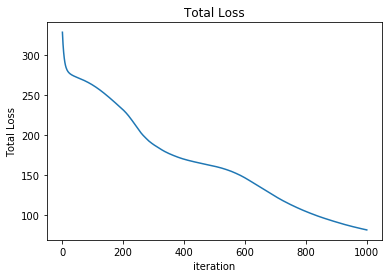

In [31]:
plt.plot(np.arange(1,iterations+1),losses)
plt.title('Total Loss')
plt.xlabel('iteration')
plt.ylabel('Total Loss')

#### 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [32]:
def gradient_ann_m(y,X,w,b,v,c,alpha,eps,iterations):
    losses= []
    
    ### d_now is the present parameter updates
    dw_now = np.zeros(shape=(3,2))
    db_now = np.zeros(shape=(3))
    dc_now = 0
    dv_now = np.zeros(shape=(3))  
    
    ### for each iteration
    for i in range(0,iterations):
        
        dw = np.zeros(shape=(3,2))
        db = np.zeros(shape=(3))
        dc = 0
        dv = np.zeros(shape=(3))
        
        
        sumloss = 0
        y_hat = []
        for m in range(0,len(y)):
            
            h,a,z,yhat = forward(y[m],X[m],w,b,v,c)
            sumloss += loss(y[m],yhat)
            #### dl/dv
            dv =dv+(-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*a

            ##### dl/dc
            dc =dc+((-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat))


            for j in range(0,3):
                if h[j]>0:
                    dw[j] =dw[j]+ ((-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j]*X[m])
                    db[j] =db[j]+ ((-y[m]/yhat+(1-y[m])/(1-yhat))*yhat*(1-yhat)*v[j])

            y_hat.append(yhat)
        
        losses.append(sumloss)
        
        ### udpate d_now
        dw_now = alpha*dw_now+eps*dw/len(y)
        dv_now = alpha*dv_now+eps*dv/len(y)
        dc_now = alpha*dc_now+eps*dc/len(y)
        db_now = alpha*db_now+eps*db/len(y)
        
        ### update parameter
        w = w-dw_now.T
        v = v-dv_now
        c= c-dc_now
        b= b-db_now
        
        #print(w,v,c,b)
    return losses,y_hat

In [33]:
eps=lr
alpha=0.5

losses2,yhat2 =  gradient_ann_m(y,x1,w,b,v,c,alpha,eps,iterations)

Text(0,0.5,'Total Loss')

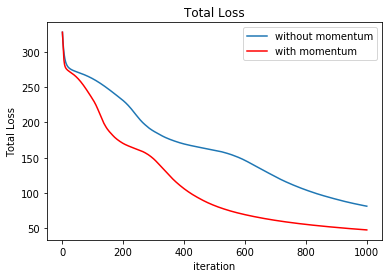

In [34]:
plt.plot(np.arange(1,iterations+1),losses,label='without momentum')
plt.plot(np.arange(1,iterations+1),losses2,label='with momentum',color = 'red')
plt.legend()
plt.title('Total Loss')
plt.xlabel('iteration')
plt.ylabel('Total Loss')

### `When keeping the same learning rate, gradient descent with momentum converges more efficiently. `

#### 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.

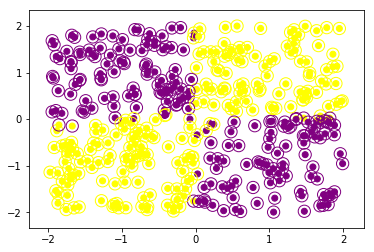

In [36]:
yclass2=['yellow']*N
for i in range(0,N):
    if yhat2[i]<0.5:
        yclass2[i]= 'purple'
plt.scatter(x1[:,0],x1[:,1],color=z)
plt.scatter(x1[:,0],x1[:,1], color='', marker='o', edgecolors=yclass2, s=150)
plt.show()

Purple and yellow circle around the points are the classification derived by ann. When probability is greater than 0.5, I set yellow circle; else, I set purple circle. As it shows, the weights optimized by backprop gives a almost perfect result with only the points around the boundary misclassified.